In [69]:
import pandas as pd
df1 = pd.read_excel('Jamie Gittens.xlsx')
print(df1)

          Player  Total actions  Goals  Assists  Shots  Shots On Target   
0  Jamie Gittens           5466     30       13    214            0.379  \

      xG  Passes  Passes Accurate  Long passes  ...  Dribbles successful   
0  21.85    2218              0.8           67  ...                0.537  \

   Duels  Duels won  Aerial duels  Aerial duels won  Interceptions  Losses   
0   2264      0.443           110               0.3            153     929  \

   Losses own half  Recoveries  Recoveries opp. half  
0            0.207         317                  0.64  

[1 rows x 24 columns]


In [2]:
df2 = pd.read_excel('CheLeiStats.xlsx')
print(df2)

                   Player            Club   Season Pos  Age  MP  Starts   Min   
0           Jamie Gittens        Dortmund  2024/25  FW   19  32      21  1776  \
1             Cole Palmer         Chelsea  2024/25  FW   22  37      36  3191   
2         Nicolas Jackson         Chelsea  2024/25  FW   23  30      28  2220   
3            Noni Madueke         Chelsea  2024/25  FW   22  32      27  2033   
4              Pedro Neto         Chelsea  2024/25  FW   24  35      24  2269   
5         Stephy Mavididi  Leicester City  2023/24  FW   25  46      42  3587   
6   Abdul Fatawu Issahaku  Leicester City  2023/24  FW   19  40      33  2814   
7             Jamie Vardy  Leicester City  2023/24  FW   36  35      18  1768   
8             Patson Daka  Leicester City  2023/24  FW   24  20      15  1086   
9           Kasey McAteer  Leicester City  2023/24  FW   21  23      13  1158   
10      Kelechi Iheanacho  Leicester City  2023/24  FW   26  23      10   921   
11            Yunus Akgün  L

Jamie Gittens | Shot Map & Goal Conversion

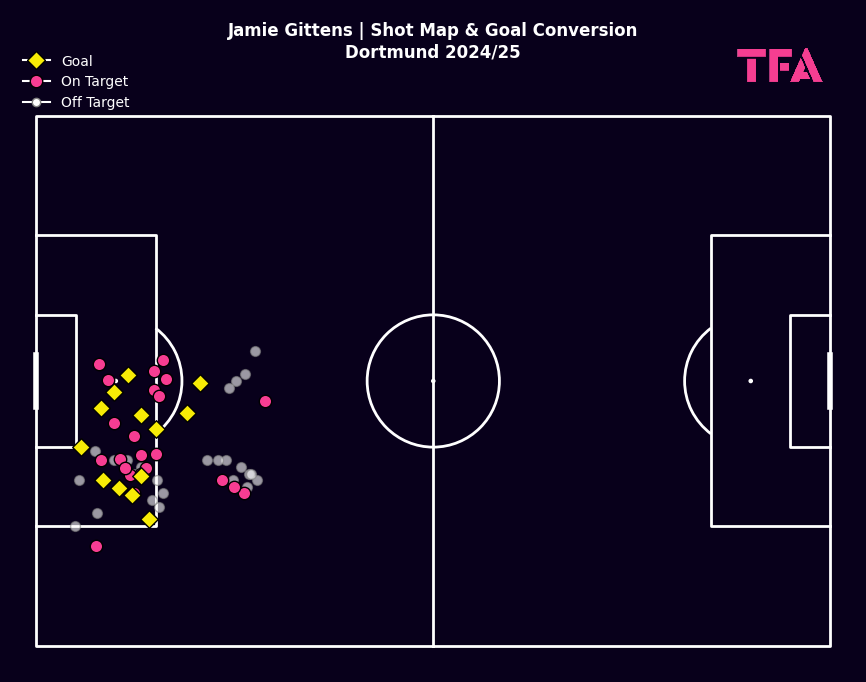

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

df3 = pd.read_csv("Shots_J_Gittens_TFA.csv")
df3['x'] = df3['x'].clip(0, 120)
df3['y'] = df3['y'].clip(0, 80)
df3['x'] = 120 - df3['x']

pitch = Pitch(pitch_type='statsbomb', pitch_color='#08001B', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
fig.patch.set_facecolor('#08001B')

goal = df3[df3['result'] == 'Goal']
on_target = df3[df3['result'] == 'On Target']
off_target = df3[df3['result'] == 'Off Target']

pitch.scatter(goal['x'], goal['y'], ax=ax, marker='D', color='#F7EB06', edgecolors='black',
              s=80, zorder=3, label='Goal')
pitch.scatter(on_target['x'], on_target['y'], ax=ax, marker='o', color='#F73D92', edgecolors='black',
              s=80, zorder=2, label='On Target')
pitch.scatter(off_target['x'], off_target['y'], ax=ax, marker='o', color='white', edgecolors='gray',
              s=50, alpha=0.6, zorder=1, label='Off Target')

plt.suptitle("Jamie Gittens | Shot Map & Goal Conversion\nDortmund 2024/25",
             color='white', fontsize=12, weight='bold', y=0.95)

legend_elements = [
    Line2D([0], [0], marker='D', color='w', label='Goal',
           markerfacecolor='#F7EB06', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='On Target',
           markerfacecolor='#F73D92', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='Off Target',
           markerfacecolor='white', markeredgecolor='gray', markersize=6)
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, frameon=False,
          labelcolor='white', bbox_to_anchor=(0, 1.083))

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.835, 0.801), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()


Jamie Gittens | Progressive Passes and Runs

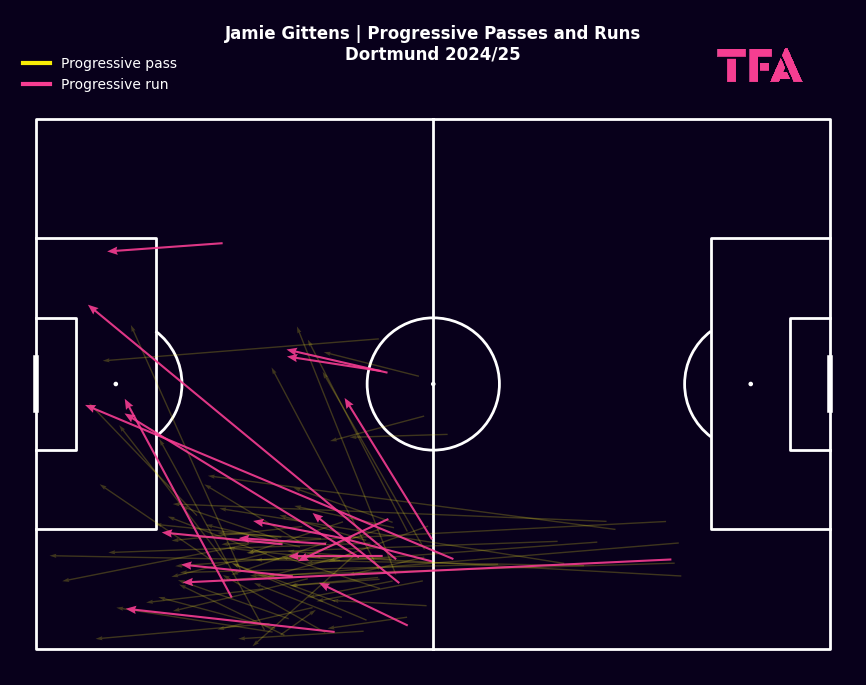

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

df = pd.read_csv("ball_progression_TFA_J_Gittens.csv")

df['x'] = df['x'].clip(0, 120)
df['y'] = df['y'].clip(0, 80)
df['x_end'] = df['x_end'].clip(0, 120)
df['y_end'] = df['y_end'].clip(0, 80)

df['x'] = 120 - df['x']
df['x_end'] = 120 - df['x_end']

df['dx'] = df['x_end'] - df['x']
df['dy'] = df['y_end'] - df['y']
df['x_end'] = df['x'] + df['dx'] * 1.05
df['y_end'] = df['y'] + df['dy'] * 1.07

df['x_end'] = df['x_end'].clip(0, 120)
df['y_end'] = df['y_end'].clip(0, 80)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#08001B', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
fig.patch.set_facecolor('#08001B')

passes = df[df['type'] == 'Progressive Pass']
runs = df[df['type'] == 'Progressive Run']

pitch.arrows(passes['x'], passes['y'], passes['x_end'], passes['y_end'],
             color="#FFF427", alpha=0.22, width=1.0, headwidth=3, ax=ax, zorder=1)

pitch.arrows(runs['x'], runs['y'], runs['x_end'], runs['y_end'],
             color='#F73D92', alpha=0.9, width=1.5, headwidth=4, ax=ax, zorder=3)

plt.suptitle("Jamie Gittens | Progressive Passes and Runs\nDortmund 2024/25",
             color='white', fontsize=12, weight='bold', y=0.95)

legend_elements = [
    Line2D([0], [0], color='#F7EB06', lw=3, label='Progressive pass'),
    Line2D([0], [0], color='#F73D92', lw=3, label='Progressive run')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, frameon=False, labelcolor='white', bbox_to_anchor=(0, 1.083))

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.815, 0.805), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Jamie Gittens Final Third Dribbles

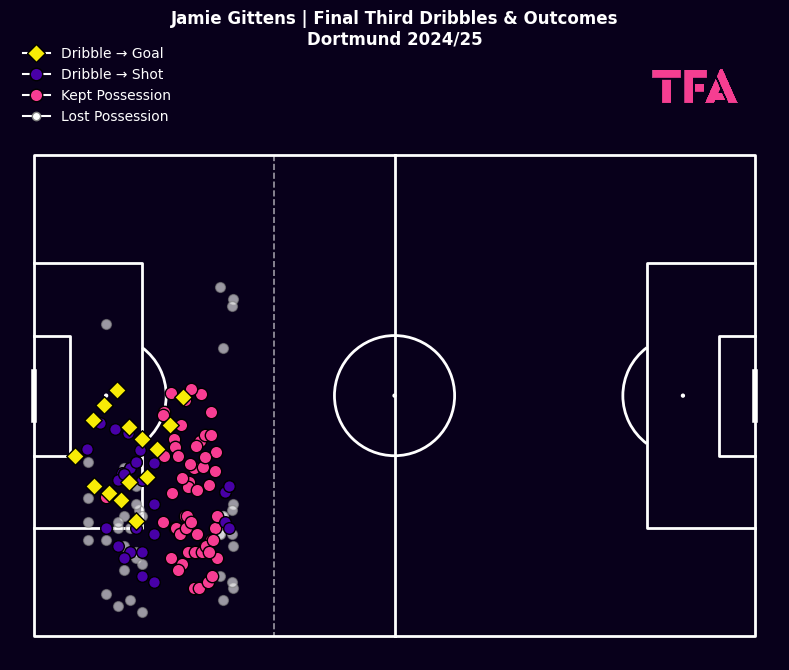

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

df4 = pd.read_csv("J_Gittens_Dribbles.csv")
df4['x'] = pd.to_numeric(df4['x'], errors='coerce').clip(0, 120)
df4['y'] = pd.to_numeric(df4['y'], errors='coerce').clip(0, 80)
df4['x'] = 120 - df4['x']

pitch = Pitch(pitch_type='statsbomb', pitch_color='#08001B', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
fig.patch.set_facecolor('#08001B')

goals = df4[(df4['action_type'] == 'Dribble Followed by Shot') & (df4['result'] == 'Goal')]
shots = df4[(df4['action_type'] == 'Dribble Followed by Shot') & (df4['result'] == 'Shot')]
kept = df4[df4['result'] == 'Kept Possession']
lost = df4[df4['result'] == 'Lost Possession']

pitch.scatter(goals['x'], goals['y'], ax=ax, marker='D', color='#F7EB06', edgecolors='black',
              s=80, zorder=3, label='Dribble → Goal')
pitch.scatter(shots['x'], shots['y'], ax=ax, marker='o', color='#F73D92', edgecolors='black',
              s=80, zorder=2, label='Dribble → Shot')
pitch.scatter(kept['x'], kept['y'], ax=ax, marker='o', color='#4800A7', edgecolors='black',
              s=70, zorder=2, label='Kept Possession')
pitch.scatter(lost['x'], lost['y'], ax=ax, marker='o', color='white', edgecolors='gray',
              s=50, alpha=0.6, zorder=1, label='Lost Possession')

ax.plot([40, 40], [0, 80], color='white', linestyle='--', linewidth=1.2, alpha=0.6)

plt.suptitle("Jamie Gittens | Final Third Dribbles & Outcomes\nDortmund 2024/25",
             color='white', fontsize=12, weight='bold', y=0.95)

legend_elements = [
    Line2D([0], [0], marker='D', color='w', label='Dribble → Goal',
           markerfacecolor='#F7EB06', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='Dribble → Shot',
           markerfacecolor='#4800A7', markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='Kept Possession',
           markerfacecolor="#F73D92", markeredgecolor='black', markersize=9),
    Line2D([0], [0], marker='o', color='w', label='Lost Possession',
           markerfacecolor='white', markeredgecolor='gray', markersize=6)
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, frameon=False,
          labelcolor='white', bbox_to_anchor=(0, 1.183))

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.750, 0.754), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Jamie Gittens 2023/24 & 2024/25 Stats

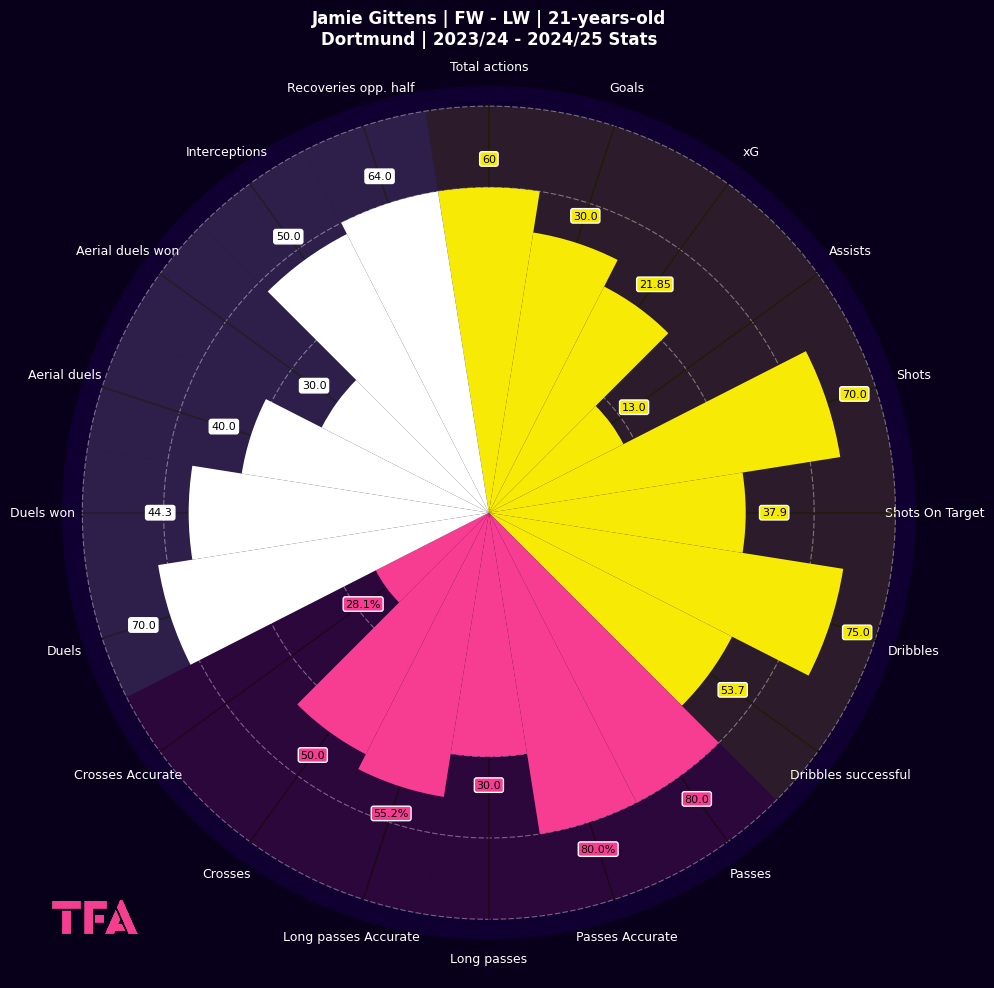

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

sections = {
    'Attacking': {
        'color': '#F7EB06',
        'metrics': {
            "Total actions": 60,
            "Goals": 30.0,
            "xG": 21.85,
            "Assists": 13.0,
            "Shots": 70.0,
            "Shots On Target": 37.9,
            "Dribbles": 75.0,
            "Dribbles successful": 53.7,
        }
    },
    'Passing': {
        'color': '#F73D92',
        'metrics': {
            "Passes": 80.0,
            "Passes Accurate": 80.0,
            "Long passes": 30.0,
            "Long passes Accurate": 55.2,
            "Crosses": 50.0,
            "Crosses Accurate": 28.1,
        }
    },
    'Dribbling & Defense': {
        'color': '#FFFFFF',
        'metrics': {
            "Duels": 70.0,
            "Duels won": 44.3,
            "Aerial duels": 40.0,
            "Aerial duels won": 30.0,
            "Interceptions": 50.0,
            "Recoveries opp. half": 64.0,
        }
    }
}

max_values = {
    "Total actions": 75,
    "Goals": 43,
    "Assists": 35,
    "Shots": 80,
    "Shots On Target": 60,
    "xG": 35,
    "Passes": 100,
    "Passes Accurate": 100,
    "Long passes": 50,
    "Long passes Accurate": 78,
    "Crosses": 75,
    "Crosses Accurate": 90,
    "Dribbles": 85,
    "Dribbles successful": 80,
    "Duels": 85,
    "Duels won": 60,
    "Aerial duels": 65,
    "Aerial duels won": 65,
    "Interceptions": 65,
    "Recoveries opp. half": 80,
}

labels = []
values = []
slice_colors = []
line_colors = []

for group in sections.values():
    for metric, val in group["metrics"].items():
        labels.append(metric)
        scaled_val = (val / max_values[metric]) * 100
        values.append(scaled_val)
        slice_colors.append(group["color"])
        line_colors.append(group["color"])

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
values += values[:1]
slice_colors += slice_colors[:1]
line_colors += line_colors[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for r in [20, 40, 60, 80, 100]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 100],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(num_vars):
    ax.bar(
        x=angles[i],
        height=100,
        width=2 * np.pi / num_vars,
        bottom=0,
        color=slice_colors[i],
        edgecolor=slice_colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(num_vars):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / num_vars,
        bottom=0,
        color=slice_colors[i],
        edgecolor=slice_colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(num_vars):
    angle_rad = angles[i]
    value = values[i]
    original_value = list(sections.values())[0]["metrics"].get(labels[i], 0) or \
                     list(sections.values())[1]["metrics"].get(labels[i], 0) or \
                     list(sections.values())[2]["metrics"].get(labels[i], 0)

    if any(x in labels[i].lower() for x in ['%', 'percent', 'accurate']):
        display_value = f"{original_value}%"
    else:
        display_value = f"{original_value}"
    
    ax.text(
        angle_rad,
        value + 7,
        display_value,
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=line_colors[i], edgecolor='white'),
        color='black' if line_colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, color='white', fontsize=9)
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.title("Jamie Gittens | FW - LW | 21-years-old\nDortmund | 2023/24 - 2024/25 Stats",
          color="white", fontsize=12, weight='bold', pad=30)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Jamie Gittens Attacking Metrics With Dortmund 2023/24 - 2024/25

C:\Users\muspo\AppData\Local\Temp\ipykernel_9716\3334377067.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, color='white', fontsize=10)


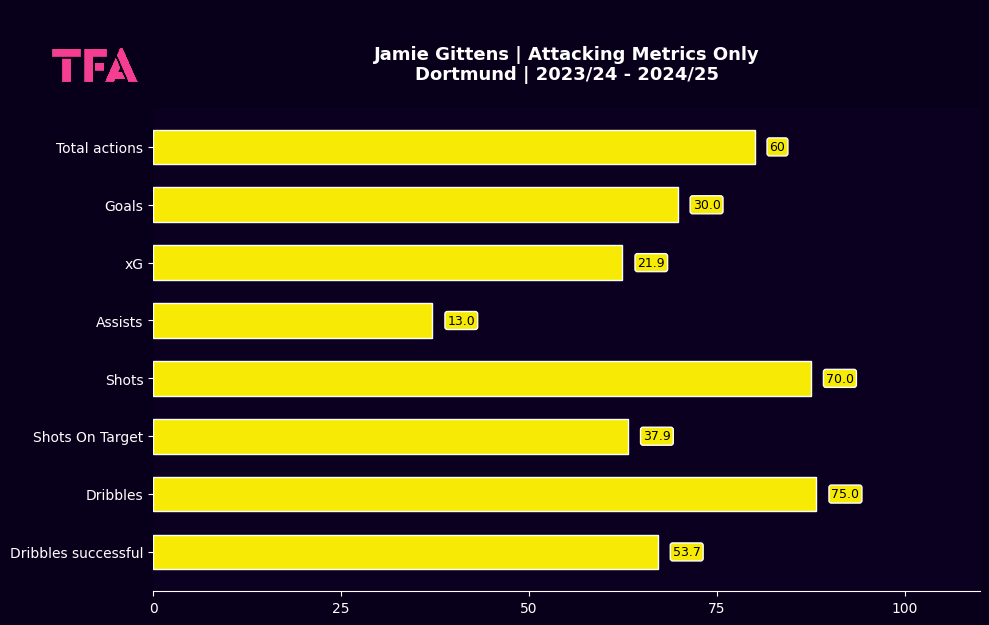

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

attacking = {
    'metrics': {
        "Total actions": 60,
        "Goals": 30.0,
        "xG": 21.85,
        "Assists": 13.0,
        "Shots": 70.0,
        "Shots On Target": 37.9,
        "Dribbles": 75.0,
        "Dribbles successful": 53.7,
    }
}

max_values = {
    "Total actions": 75,
    "Goals": 43,
    "Assists": 35,
    "Shots": 80,
    "Shots On Target": 60,
    "xG": 35,
    "Dribbles": 85,
    "Dribbles successful": 80,
}

labels = list(attacking["metrics"].keys())
original_values = list(attacking["metrics"].values())
scaled_values = [(val / max_values[label]) * 100 for label, val in zip(labels, original_values)]

yellow_color = "#F7EB06"

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0B0020")

bars = ax.barh(labels, scaled_values, color=yellow_color, edgecolor='white', height=0.6)

for i, (bar, val, raw) in enumerate(zip(bars, scaled_values, original_values)):
    ax.text(val + 2, bar.get_y() + bar.get_height() / 2,
            f"{raw:.1f}" if isinstance(raw, float) else f"{raw}",
            va='center', ha='left', fontsize=9, color='black',
            bbox=dict(boxstyle="round,pad=0.2", facecolor=yellow_color, edgecolor='white'))

ax.set_xlim(0, 110)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0', '25', '50', '75', '100'], color='white')
ax.set_yticklabels(labels, color='white', fontsize=10)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')

plt.title("Jamie Gittens | Attacking Metrics Only\nDortmund | 2023/24 - 2024/25",
          color="white", fontsize=13, weight='bold', pad=20)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.84), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Jamie Gittens Passing Skill with Dortmund 2023/24 & 2024/25 Seasons

C:\Users\muspo\AppData\Local\Temp\ipykernel_9716\3412330469.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, color='white', fontsize=10)


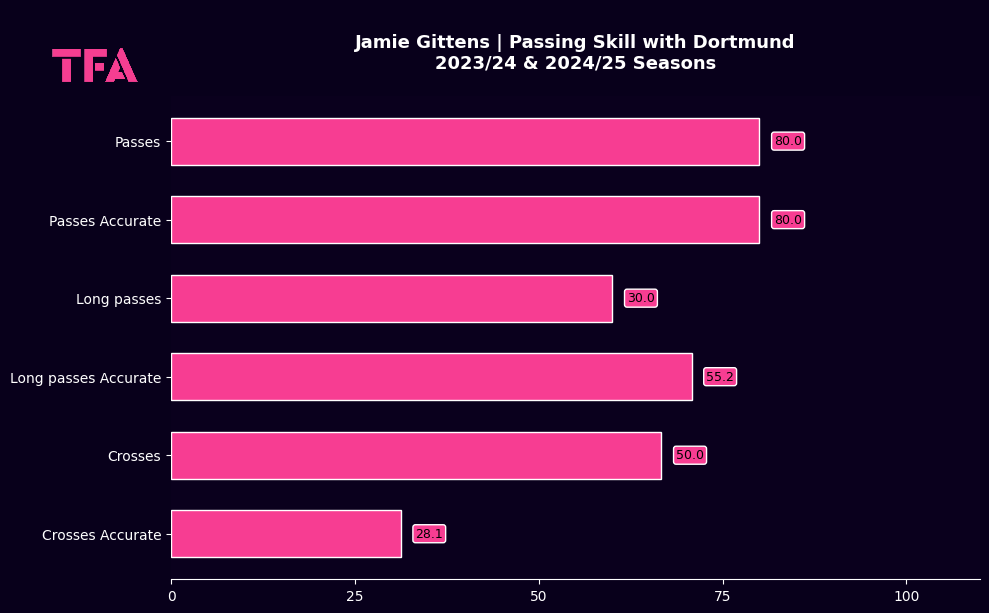

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

passing = {
    'metrics': {
        "Passes": 80.0,
        "Passes Accurate": 80.0,
        "Long passes": 30.0,
        "Long passes Accurate": 55.2,
        "Crosses": 50.0,
        "Crosses Accurate": 28.1,
    }
}

max_values = {
    "Passes": 100,
    "Passes Accurate": 100,
    "Long passes": 50,
    "Long passes Accurate": 78,
    "Crosses": 75,
    "Crosses Accurate": 90,
}

labels = list(passing["metrics"].keys())
original_values = list(passing["metrics"].values())
scaled_values = [(val / max_values[label]) * 100 for label, val in zip(labels, original_values)]

pink_color = "#F73D92"

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0A001D")

bars = ax.barh(labels, scaled_values, color=pink_color, edgecolor='white', height=0.6)

for i, (bar, val, raw) in enumerate(zip(bars, scaled_values, original_values)):
    ax.text(val + 2, bar.get_y() + bar.get_height() / 2,
            f"{raw:.1f}" if isinstance(raw, float) else f"{raw}",
            va='center', ha='left', fontsize=9, color='black',
            bbox=dict(boxstyle="round,pad=0.2", facecolor=pink_color, edgecolor='white'))

ax.set_xlim(0, 110)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0', '25', '50', '75', '100'], color='white')
ax.set_yticklabels(labels, color='white', fontsize=10)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')

plt.title("Jamie Gittens | Passing Skill with Dortmund\n2023/24 & 2024/25 Seasons",
          color="white", fontsize=13, weight='bold', pad=20)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.82), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Jamie Gittens Defensive & Duelling Skill with Dortmund 2023/24 & 2024/25 Seasons

C:\Users\muspo\AppData\Local\Temp\ipykernel_9716\2629350518.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, color='white', fontsize=10)


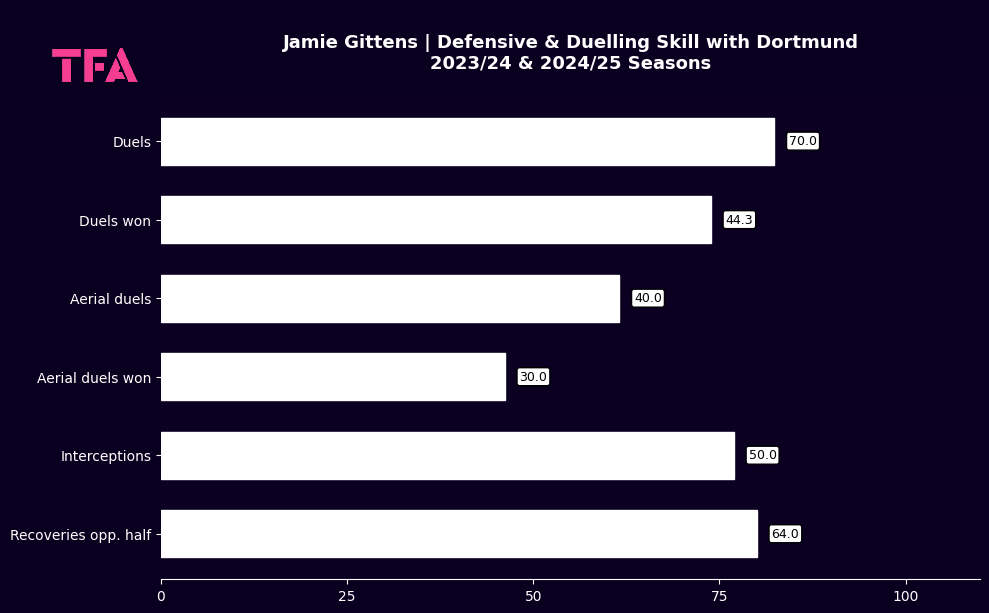

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

defensive = {
    'metrics': {
        "Duels": 70.0,
        "Duels won": 44.3,
        "Aerial duels": 40.0,
        "Aerial duels won": 30.0,
        "Interceptions": 50.0,
        "Recoveries opp. half": 64.0,
    }
}

max_values = {
    "Duels": 85,
    "Duels won": 60,
    "Aerial duels": 65,
    "Aerial duels won": 65,
    "Interceptions": 65,
    "Recoveries opp. half": 80,
}

labels = list(defensive["metrics"].keys())
original_values = list(defensive["metrics"].values())
scaled_values = [(val / max_values[label]) * 100 for label, val in zip(labels, original_values)]

white_color = "#FFFFFF"

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor("#09001F")
ax.set_facecolor("#0B0022")

bars = ax.barh(labels, scaled_values, color=white_color, edgecolor='white', height=0.6)

for i, (bar, val, raw) in enumerate(zip(bars, scaled_values, original_values)):
    ax.text(val + 2, bar.get_y() + bar.get_height() / 2,
            f"{raw:.1f}" if isinstance(raw, float) else f"{raw}",
            va='center', ha='left', fontsize=9, color='black',
            bbox=dict(boxstyle="round,pad=0.2", facecolor=white_color, edgecolor='black'))

ax.set_xlim(0, 110)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0', '25', '50', '75', '100'], color='white')
ax.set_yticklabels(labels, color='white', fontsize=10)
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white')

plt.title("Jamie Gittens | Defensive & Duelling Skill with Dortmund\n2023/24 & 2024/25 Seasons",
          color="white", fontsize=13, weight='bold', pad=20)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.82), frameon=False,
                        xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()

Jamie Gittens compared to forwards under Maresca\nat Chelsea & Leicester City

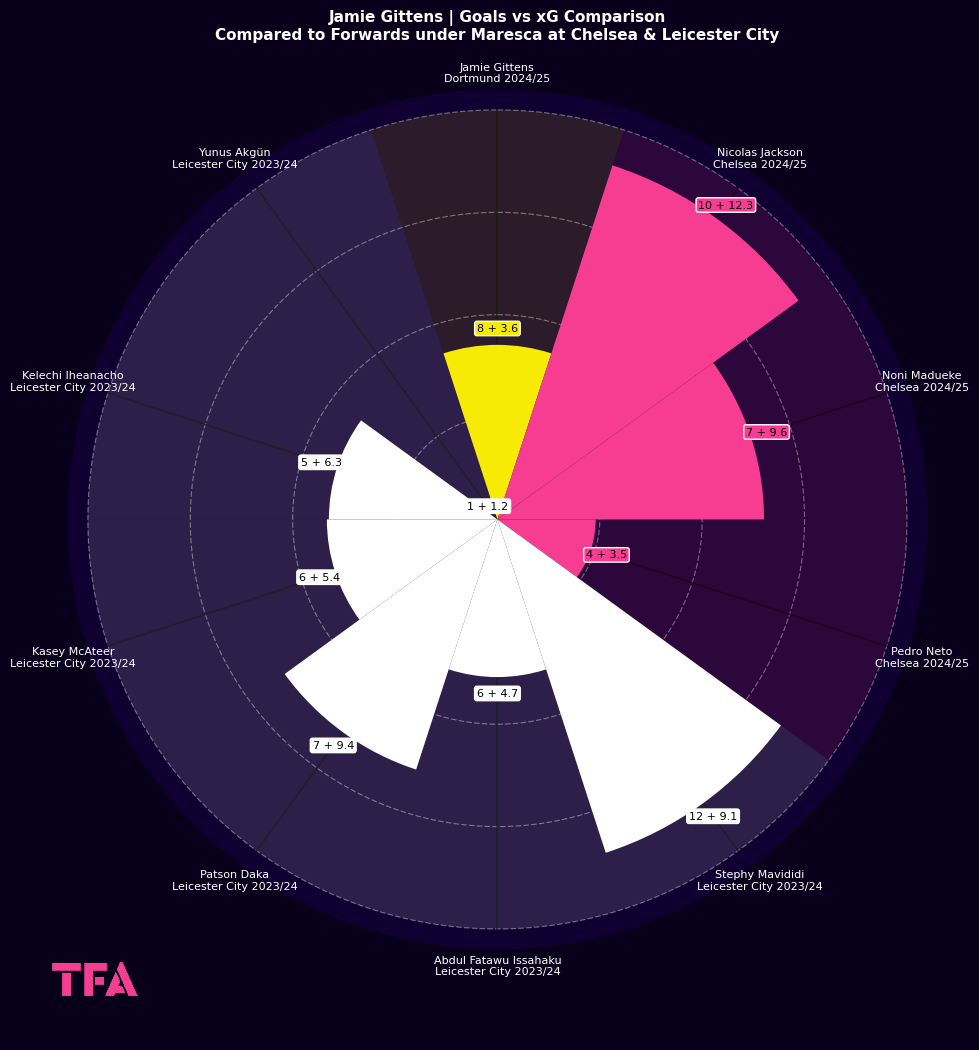

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Player": ["Jamie Gittens", "Nicolas Jackson", "Noni Madueke", "Pedro Neto", "Stephy Mavididi", "Abdul Fatawu Issahaku", "Patson Daka", "Kasey McAteer", "Kelechi Iheanacho", "Yunus Akgün"],
    "Club": ["Dortmund", "Chelsea", "Chelsea", "Chelsea", "Leicester City", "Leicester City", "Leicester City", "Leicester City", "Leicester City", "Leicester City"],
    "Season": ["2024/25", "2024/25", "2024/25", "2024/25", "2023/24", "2023/24", "2023/24", "2023/24", "2023/24", "2023/24"],
    "Gls": [8, 10, 7, 4, 12, 6, 7, 6, 5, 1],
    "xG": [3.6, 12.3, 9.6, 3.5, 9.1, 4.7, 9.4, 5.4, 6.3, 1.2]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler()
df[["Gls_norm", "xG_norm"]] = scaler.fit_transform(df[["Gls", "xG"]])
df["Total_norm"] = df["Gls_norm"] + df["xG_norm"]

club_colors = {
    "Dortmund": "#F7EB06",
    "Chelsea": "#F73D92",
    "Leicester City": "#FFFFFF"
}

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]
values = df["Total_norm"].tolist()
values += values[:1]
colors = [club_colors[club] for club in df["Club"]]
colors += [colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.5, 1.0, 1.5, 2.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 2],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=2,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    angle_rad = angles[i]
    gls = df["Gls"][i]
    xg = df["xG"][i]
    val = values[i]
    name = df["Player"][i]
    club = df["Club"][i]
    season = df["Season"][i]

    ax.text(
        angle_rad,
        val + 0.08,
        f"{gls} + {xg:.1f}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

    ax.text(
        angle_rad,
        2.18,
        f"{name}\n{club} {season}",
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Jamie Gittens | Goals vs xG Comparison\nCompared to Forwards under Maresca at Chelsea & Leicester City",
             color='white', fontsize=11, weight='bold', y=1.04)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Jamie Gittens vs fellow forwards\nin Progressive Carries

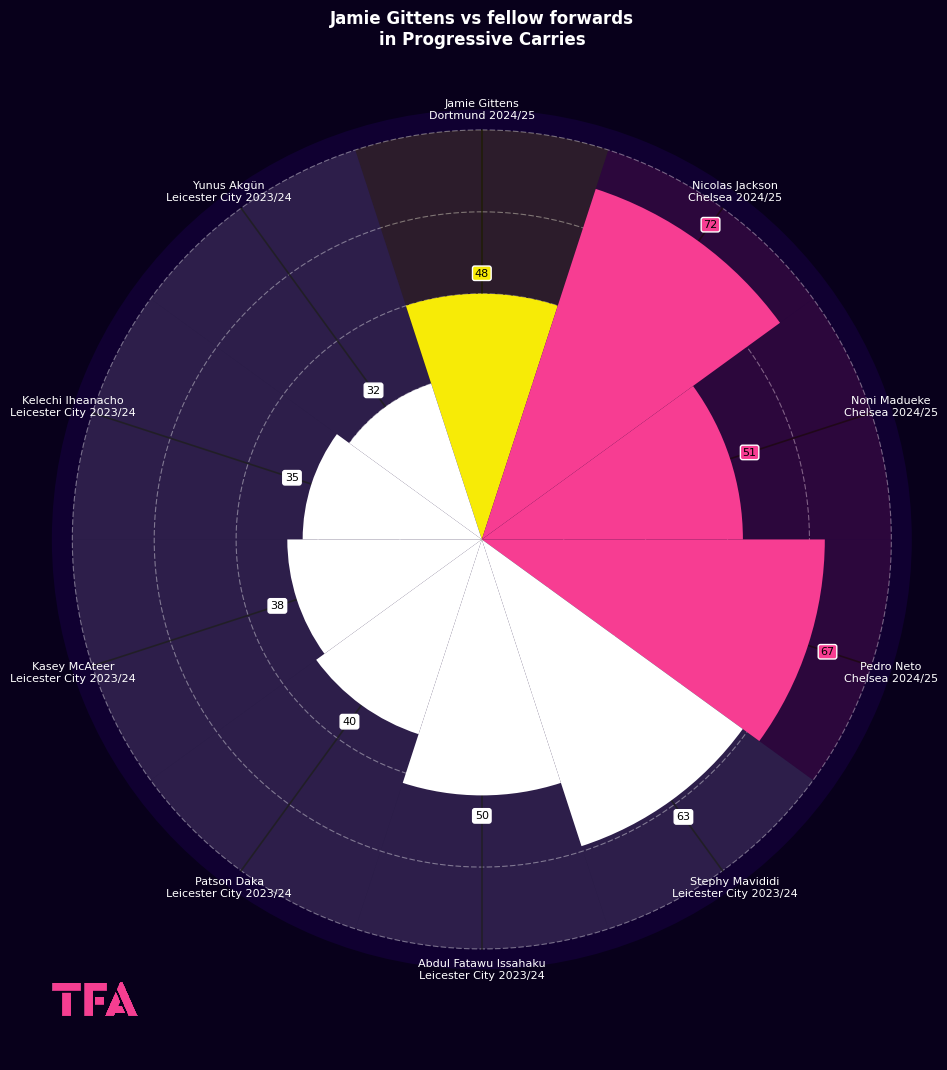

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Player": ["Jamie Gittens", "Nicolas Jackson", "Noni Madueke", "Pedro Neto", "Stephy Mavididi", "Abdul Fatawu Issahaku", "Patson Daka", "Kasey McAteer", "Kelechi Iheanacho", "Yunus Akgün"],
    "Club": ["Dortmund", "Chelsea", "Chelsea", "Chelsea", "Leicester City", "Leicester City", "Leicester City", "Leicester City", "Leicester City", "Leicester City"],
    "Season": ["2024/25", "2024/25", "2024/25", "2024/25", "2023/24", "2023/24", "2023/24", "2023/24", "2023/24", "2023/24"],
    "PrgC": [48, 72, 51, 67, 63, 50, 40, 38, 35, 32]
}

df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["PrgC_norm"] = scaler.fit_transform(df[["PrgC"]])
values = df["PrgC_norm"].tolist()
values += values[:1]

club_colors = {
    "Dortmund": "#F7EB06",
    "Chelsea": "#F73D92",
    "Leicester City": "#FFFFFF"
}

angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]
colors = [club_colors[club] for club in df["Club"]]
colors += [colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    angle_rad = angles[i]
    val = values[i]
    prgc = df["PrgC"][i]
    name = df["Player"][i]
    club = df["Club"][i]
    season = df["Season"][i]

    ax.text(
        angle_rad,
        val + 0.05,
        f"{prgc}",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black' if colors[i] != '#FFFFFF' else 'black',
        zorder=4
    )

    ax.text(
        angle_rad,
        1.05,
        f"{name}\n{club} {season}",
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Jamie Gittens vs fellow forwards\nin Progressive Carries",
             color='white', fontsize=12, weight='bold', y=1.06)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

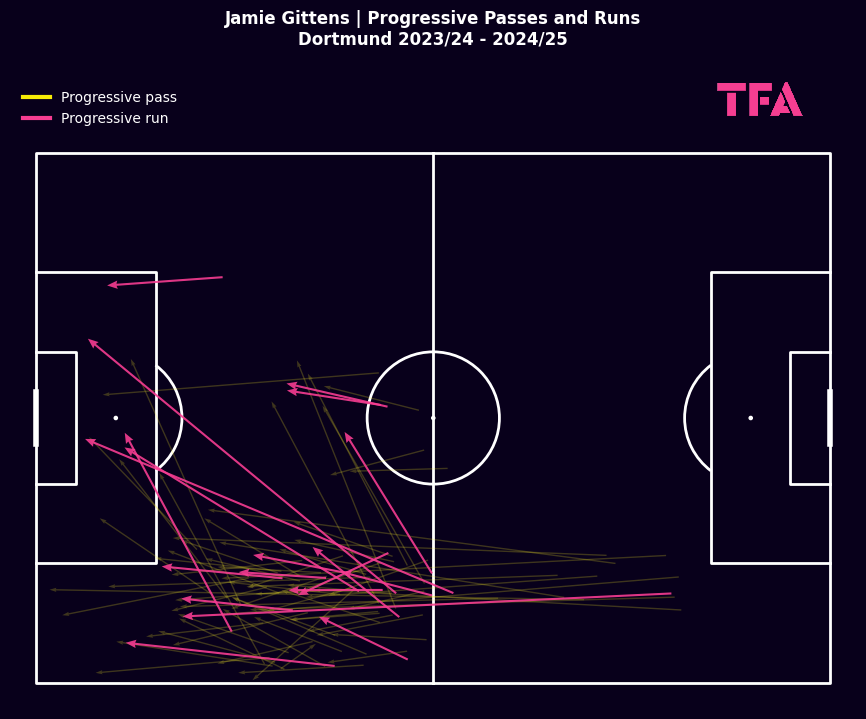

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

df = pd.read_csv("ball_progression_TFA_J_Gittens.csv")

df['x'] = df['x'].clip(0, 120)
df['y'] = df['y'].clip(0, 80)
df['x_end'] = df['x_end'].clip(0, 120)
df['y_end'] = df['y_end'].clip(0, 80)

df['x'] = 120 - df['x']
df['x_end'] = 120 - df['x_end']

df['dx'] = df['x_end'] - df['x']
df['dy'] = df['y_end'] - df['y']
df['x_end'] = df['x'] + df['dx'] * 1.05
df['y_end'] = df['y'] + df['dy'] * 1.07

df['x_end'] = df['x_end'].clip(0, 120)
df['y_end'] = df['y_end'].clip(0, 80)

pitch = Pitch(pitch_type='statsbomb', pitch_color='#08001B', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
fig.patch.set_facecolor('#08001B')

passes = df[df['type'] == 'Progressive Pass']
runs = df[df['type'] == 'Progressive Run']

pitch.arrows(passes['x'], passes['y'], passes['x_end'], passes['y_end'],
             color="#FFF427", alpha=0.22, width=1.0, headwidth=3, ax=ax, zorder=1)

pitch.arrows(runs['x'], runs['y'], runs['x_end'], runs['y_end'],
             color='#F73D92', alpha=0.9, width=1.5, headwidth=4, ax=ax, zorder=3)

plt.suptitle("Jamie Gittens | Progressive Passes and Runs\nDortmund 2023/24 - 2024/25",
             color='white', fontsize=12, weight='bold', y=1.02)

legend_elements = [
    Line2D([0], [0], color='#F7EB06', lw=3, label='Progressive pass'),
    Line2D([0], [0], color='#F73D92', lw=3, label='Progressive run')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=10, frameon=False, labelcolor='white', bbox_to_anchor=(0, 1.083))

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.815, 0.805), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.tight_layout()
plt.show()